# Project: Investigate Logistic Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Question</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Deficiciency/Area of Improvement</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This database contains 4 tables that are related to each other

<a id='questions'></a>
## Questions

> **question_1**:  Days with highest shipment

> **question_2**:  Top 10 shipments id with highest items

> **question_3**:  days with highest amount of shipments

> **question_4**:  Status Count to check the ratio of successful delivery to the entire survey

> **question_5**:  items count for each carrier

> **question_6**:  shipment count for each carrier

> **question_7**:  items count for each destination

> **question_8**:  shipment count for each destination

> **question_9**:  items count for each month

> **question_10**: shipment count for each month

> **question_11**:  items count for each weekday

> **question_12**: shipment count for each weekday


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will check for cleanliness, and then trim and clean the tables in the database for analysis.

### General Properties/ General Inspection

In [1]:
# Import useful libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

import pycountry

In [2]:
#importing the various tables(sheet) from the database(excel file)

shipments_df = pd.read_excel('pangea.xlsx',sheet_name='Shipments')
Trackers_df = pd.read_excel('pangea.xlsx',sheet_name='Trackers')
Details_df = pd.read_excel('pangea.xlsx',sheet_name='Details')
Address_df = pd.read_excel('pangea.xlsx',sheet_name='Address')

In [3]:
#check the shape
database = {'shipments':shipments_df,'Trackers':Trackers_df,'Details':Details_df,'Address':Address_df}

for name,table in database.items():
    print(f"the {name} table contains {table.shape[0]} rows and {table.shape[1]} columns")

the shipments table contains 2000 rows and 3 columns
the Trackers table contains 2000 rows and 4 columns
the Details table contains 11787 rows and 4 columns
the Address table contains 1962 rows and 2 columns


> the shipments table contains **2000 rows and 3 columns**

> the Trackers table contains **2000 rows and 4 columns**

> the Details table contains **11787 rows and 4 columns**

> the Address table contains **1962 rows and 2 columns**

In [4]:
#Extract Full information about our database, example data types, and null values
for name,table in database.items():
    print(name)
    print("____________")
    print(table.info())
    print("=====================================================================================>")

shipments
____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2000 non-null   int64 
 1   address_id  2000 non-null   int64 
 2   datetime    2000 non-null   object
dtypes: int64(2), object(1)
memory usage: 47.0+ KB
None
=====================================================================================>
Trackers
____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2000 non-null   int64 
 1   shipment_id  2000 non-null   int64 
 2   carrier      2000 non-null   object
 3   datetime     2000 non-null   object
dtypes: int64(2), object(2)
memory usage: 62.6+ KB
None
=====================================================================================>
Details
___

> from the investigation on the features information and variables types for the different tables, we can see that the individual table is devoid of null values, while all the date time columns are to be converted from object to datetime for clean and easy analysis

In [5]:
for name,table in database.items():
    print(name)
    print("____________")
    print(table.nunique())
    print("=====================================================================================>")

shipments
____________
id            2000
address_id    1962
datetime        26
dtype: int64
=====================================================================================>
Trackers
____________
id             2000
shipment_id    2000
carrier           2
datetime         20
dtype: int64
=====================================================================================>
Details
____________
id            11787
tracker_id     1925
status           24
datetime        168
dtype: int64
=====================================================================================>
Address
____________
id         1962
country      35
dtype: int64
=====================================================================================>


> this unique value investigation is very essential for join the different tables for analytical purposes, so far we have

>> **2000** shipments with their unique tracker id

>> **2** carrier conveying all the shipments in our survey

>> **1962** destination address in 35 countries

>> **11787** items spread across the different shipments and carrier

>> **24** status description


## Data Cleaning

In [6]:
database_1 = {'shipment':shipments_df,'tracker':Trackers_df,'item':Details_df,'address':Address_df}


for name,table in database_1.items():
    table.rename({'id': f'{name}_id'}, axis=1, inplace=True)
    try:
        table.datetime  = pd.to_datetime(table.datetime)
        table.rename({'datetime': f'{name}_datetime'}, axis=1, inplace=True)
    except:
        print(f"{name}.datetime column not available")

address.datetime column not available


> this part of data cleaning will enable effective and optimized join in our database

In [7]:
#adding the country_name to the address table 
countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

Address_df['country_name'] = [countries.get(country, 'Unknown code') for country in Address_df.country]

In [8]:
#extracting the day of the week,month for the various shipment
shipments_df['release_month'] = shipments_df.shipment_datetime.dt.month_name()
shipments_df['release_weekdays'] = shipments_df.shipment_datetime.dt.day_name()

In [9]:
result = pd.merge(shipments_df, Address_df, on="address_id")

In [10]:
result

,shipment_id,address_id,shipment_datetime,release_month,release_weekdays,country,country_name
0,60129094,101630021,2007-02-20,February,Tuesday,US,United States
1,60130126,101521458,2007-02-19,February,Monday,US,United States
2,60130127,101312614,2007-02-19,February,Monday,US,United States
3,60130128,101258207,2007-02-19,February,Monday,US,United States
4,60130129,101521466,2007-02-19,February,Monday,US,United States
...,...,...,...,...,...,...,...
1995,60631160,102526038,2007-07-27,July,Friday,SG,Singapore
1996,60631162,102795627,2007-07-27,July,Friday,SG,Singapore
1997,60631163,102525885,2007-07-27,July,Friday,SG,Singapore
1998,60631168,102521377,2007-07-27,July,Friday,SG,Singapore


In [11]:
result_v2 = pd.merge(result,Trackers_df, on="shipment_id")

In [12]:
result_v2

,shipment_id,address_id,shipment_datetime,release_month,release_weekdays,country,country_name,tracker_id,carrier,tracker_datetime
0,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18
1,60130126,101521458,2007-02-19,February,Monday,US,United States,49821404100,carrier 1,2007-02-18
2,60130127,101312614,2007-02-19,February,Monday,US,United States,49821404101,carrier 1,2007-02-18
3,60130128,101258207,2007-02-19,February,Monday,US,United States,49821404102,carrier 1,2007-02-18
4,60130129,101521466,2007-02-19,February,Monday,US,United States,49821404104,carrier 1,2007-02-18
...,...,...,...,...,...,...,...,...,...,...
1995,60631160,102526038,2007-07-27,July,Friday,SG,Singapore,49821893407,carrier 2,2007-07-27
1996,60631162,102795627,2007-07-27,July,Friday,SG,Singapore,49821893409,carrier 2,2007-07-27
1997,60631163,102525885,2007-07-27,July,Friday,SG,Singapore,49821893408,carrier 2,2007-07-27
1998,60631168,102521377,2007-07-27,July,Friday,SG,Singapore,49821893411,carrier 2,2007-07-27


In [13]:
combined_database = pd.merge(result_v2,Details_df, on="tracker_id",how='outer')

In [14]:
combined_database

,shipment_id,address_id,shipment_datetime,release_month,release_weekdays,country,country_name,tracker_id,carrier,tracker_datetime,item_id,status,item_datetime
0,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
1,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
2,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,arrived_at_destination,2007-02-25
3,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
4,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11857,60631168,102521377,2007-07-27,July,Friday,SG,Singapore,49821893411,carrier 2,2007-07-27,4.542624e+11,SUCCESS,2007-07-28
11858,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542619e+11,ORDER_RECEIVED_AT_LOCAL_SORTING_CENTER,2007-07-27
11859,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542619e+11,ORDER_PICKED_UP,2007-07-27
11860,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542620e+11,DELIVERY_IN_PROGRESS,2007-07-27


> from the tracker_datetime and shipment datetime, I observed that the tracker datetime lag for items meaning that should probably be the date the item was package for shipment, while the item datetime lead for some item, meaning that should be the time for its current status, so I will remain the various column to reflect what they really mean.

In [15]:
combined_database.rename({'tracker_datetime': 'package_datetime','item_datetime': 'current_status_datetime'}, axis=1, inplace=True)

In [16]:
combined_database

,shipment_id,address_id,shipment_datetime,release_month,release_weekdays,country,country_name,tracker_id,carrier,package_datetime,item_id,status,current_status_datetime
0,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
1,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
2,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,arrived_at_destination,2007-02-25
3,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
4,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11857,60631168,102521377,2007-07-27,July,Friday,SG,Singapore,49821893411,carrier 2,2007-07-27,4.542624e+11,SUCCESS,2007-07-28
11858,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542619e+11,ORDER_RECEIVED_AT_LOCAL_SORTING_CENTER,2007-07-27
11859,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542619e+11,ORDER_PICKED_UP,2007-07-27
11860,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542620e+11,DELIVERY_IN_PROGRESS,2007-07-27


In [17]:
combined_database

,shipment_id,address_id,shipment_datetime,release_month,release_weekdays,country,country_name,tracker_id,carrier,package_datetime,item_id,status,current_status_datetime
0,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
1,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
2,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,arrived_at_destination,2007-02-25
3,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
4,60129094,101630021,2007-02-20,February,Tuesday,US,United States,49821404408,carrier 1,2007-02-18,4.541705e+11,out_for_delivery,2007-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11857,60631168,102521377,2007-07-27,July,Friday,SG,Singapore,49821893411,carrier 2,2007-07-27,4.542624e+11,SUCCESS,2007-07-28
11858,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542619e+11,ORDER_RECEIVED_AT_LOCAL_SORTING_CENTER,2007-07-27
11859,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542619e+11,ORDER_PICKED_UP,2007-07-27
11860,60631170,102790469,2007-07-27,July,Friday,SG,Singapore,49821893412,carrier 2,2007-07-27,4.542620e+11,DELIVERY_IN_PROGRESS,2007-07-27


In [18]:
combined_database.isna().sum()

shipment_id                 0
address_id                  0
shipment_datetime           0
release_month               0
release_weekdays            0
country                     0
country_name                0
tracker_id                  0
carrier                     0
package_datetime            0
item_id                    75
status                     75
current_status_datetime    75
dtype: int64

> this investigation shows that no item was associated with **75 track_id** and its corresponding shipment_id

### Research Question 1  (days with highest amount of items been shipped)

In [19]:
combined_database.groupby('shipment_datetime')['shipment_datetime'].count()

shipment_datetime
2007-02-19    5585
2007-02-20    1279
2007-02-21       4
2007-02-23      18
2007-02-24     595
2007-02-27       9
2007-04-17       2
2007-04-21       1
2007-05-15      30
2007-05-16       1
2007-05-18       5
2007-06-04       1
2007-06-08      73
2007-06-10     781
2007-06-15     448
2007-06-16       4
2007-06-24       1
2007-07-15     390
2007-07-16       6
2007-07-17     411
2007-07-20     474
2007-07-21     580
2007-07-22       8
2007-07-23     641
2007-07-27     505
2007-09-12      10
Name: shipment_datetime, dtype: int64

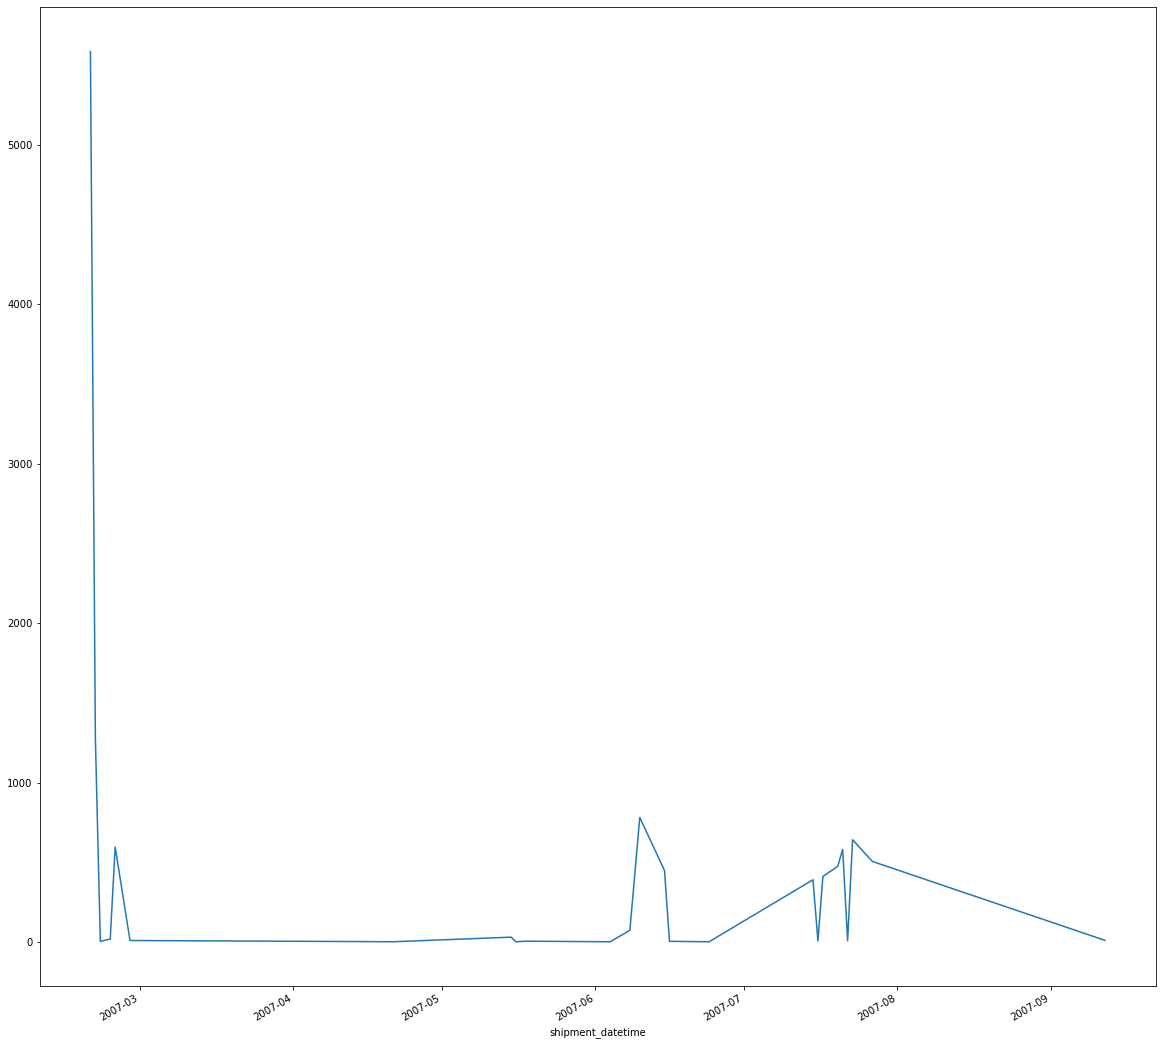

In [20]:
fig, ax = plt.subplots(figsize=(20,20)) 
combined_database.groupby('shipment_datetime')['shipment_datetime'].count().plot(ax=ax);

### Research Question 2  (days with highest amount of shipments)

In [21]:
result.groupby('shipment_datetime')['shipment_datetime'].count()

shipment_datetime
2007-02-19    655
2007-02-20    229
2007-02-21      1
2007-02-23      4
2007-02-24    106
2007-02-27      2
2007-04-17      2
2007-04-21      1
2007-05-15      4
2007-05-16      1
2007-05-18      2
2007-06-04      1
2007-06-08     16
2007-06-10    177
2007-06-15     66
2007-06-16      4
2007-06-24      1
2007-07-15     74
2007-07-16      1
2007-07-17     80
2007-07-20    240
2007-07-21    116
2007-07-22      8
2007-07-23    109
2007-07-27     92
2007-09-12      8
Name: shipment_datetime, dtype: int64

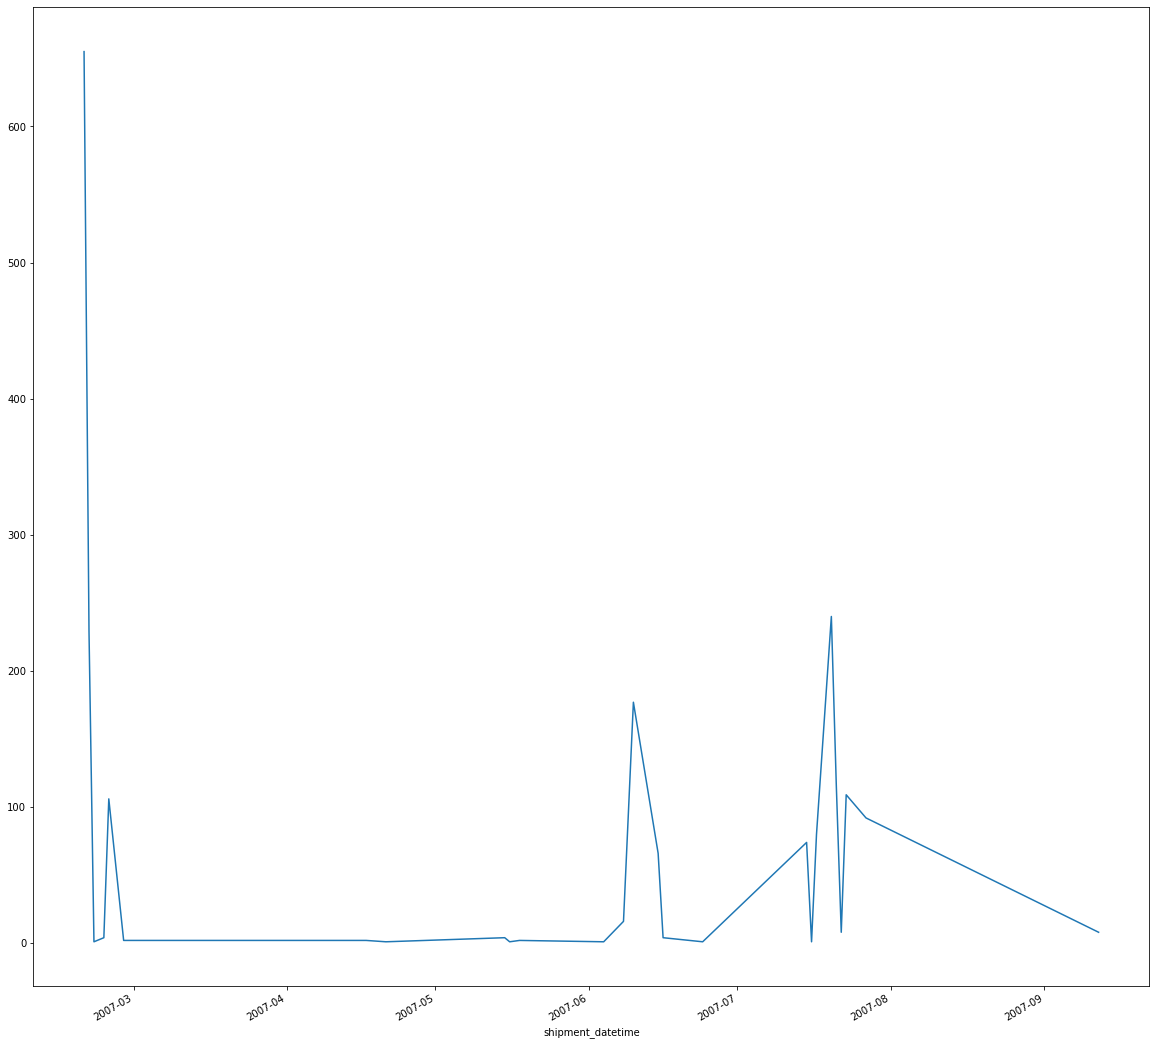

In [22]:
fig, ax = plt.subplots(figsize=(20,20)) 
result.groupby('shipment_datetime')['shipment_datetime'].count().plot(ax=ax);

### Research Question 3  (Top 10 shipments id with highest items)

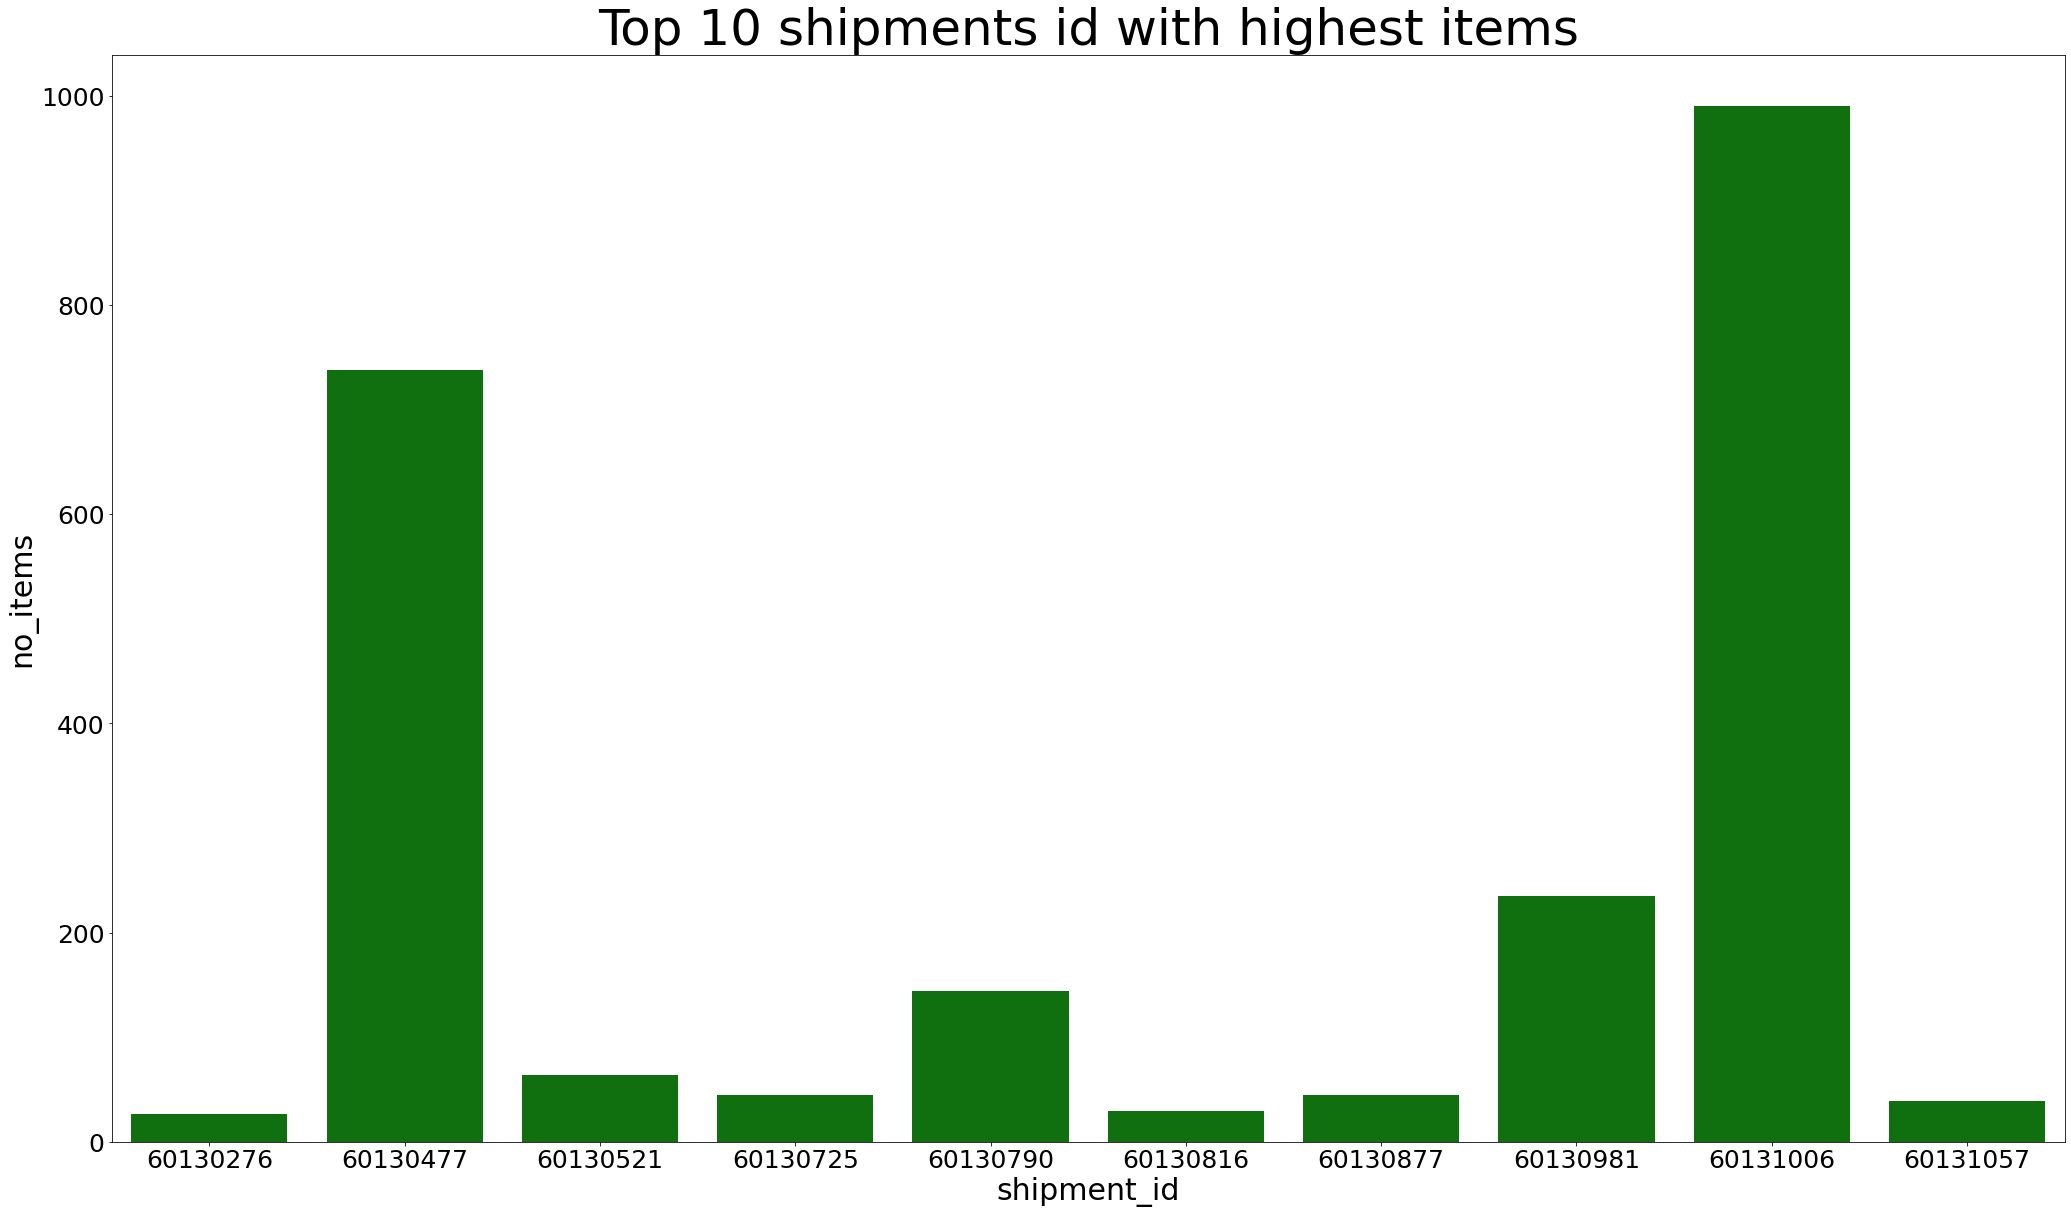

In [23]:
top_10_shipment = pd.DataFrame(combined_database.shipment_id.value_counts().rename('item_count').head(10))

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = top_10_shipment.index,y = 'item_count',data = top_10_shipment,ax=ax,color="green")
b.axes.set_title("Top 10 shipments id with highest items",fontsize=50)
b.set_xlabel("shipment_id",fontsize=30)
b.set_ylabel("no_items",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

### Research Question 4 (Status Count)

In [24]:
pd.DataFrame(combined_database.status.value_counts().rename('item_count'))

,item_count
out_for_delivery,3386
in_transit,2117
DELIVERY_IN_PROGRESS,1057
ORDER_RECEIVED_AT_LOCAL_SORTING_CENTER,963
arrived_at_destination,961
SUCCESS,768
delivery_exception,693
ORDER_PICKED_UP,616
ORDER_RECEIVED_BY_AIRLINE,236
CANCELLED_BY_CUSTOMER,215


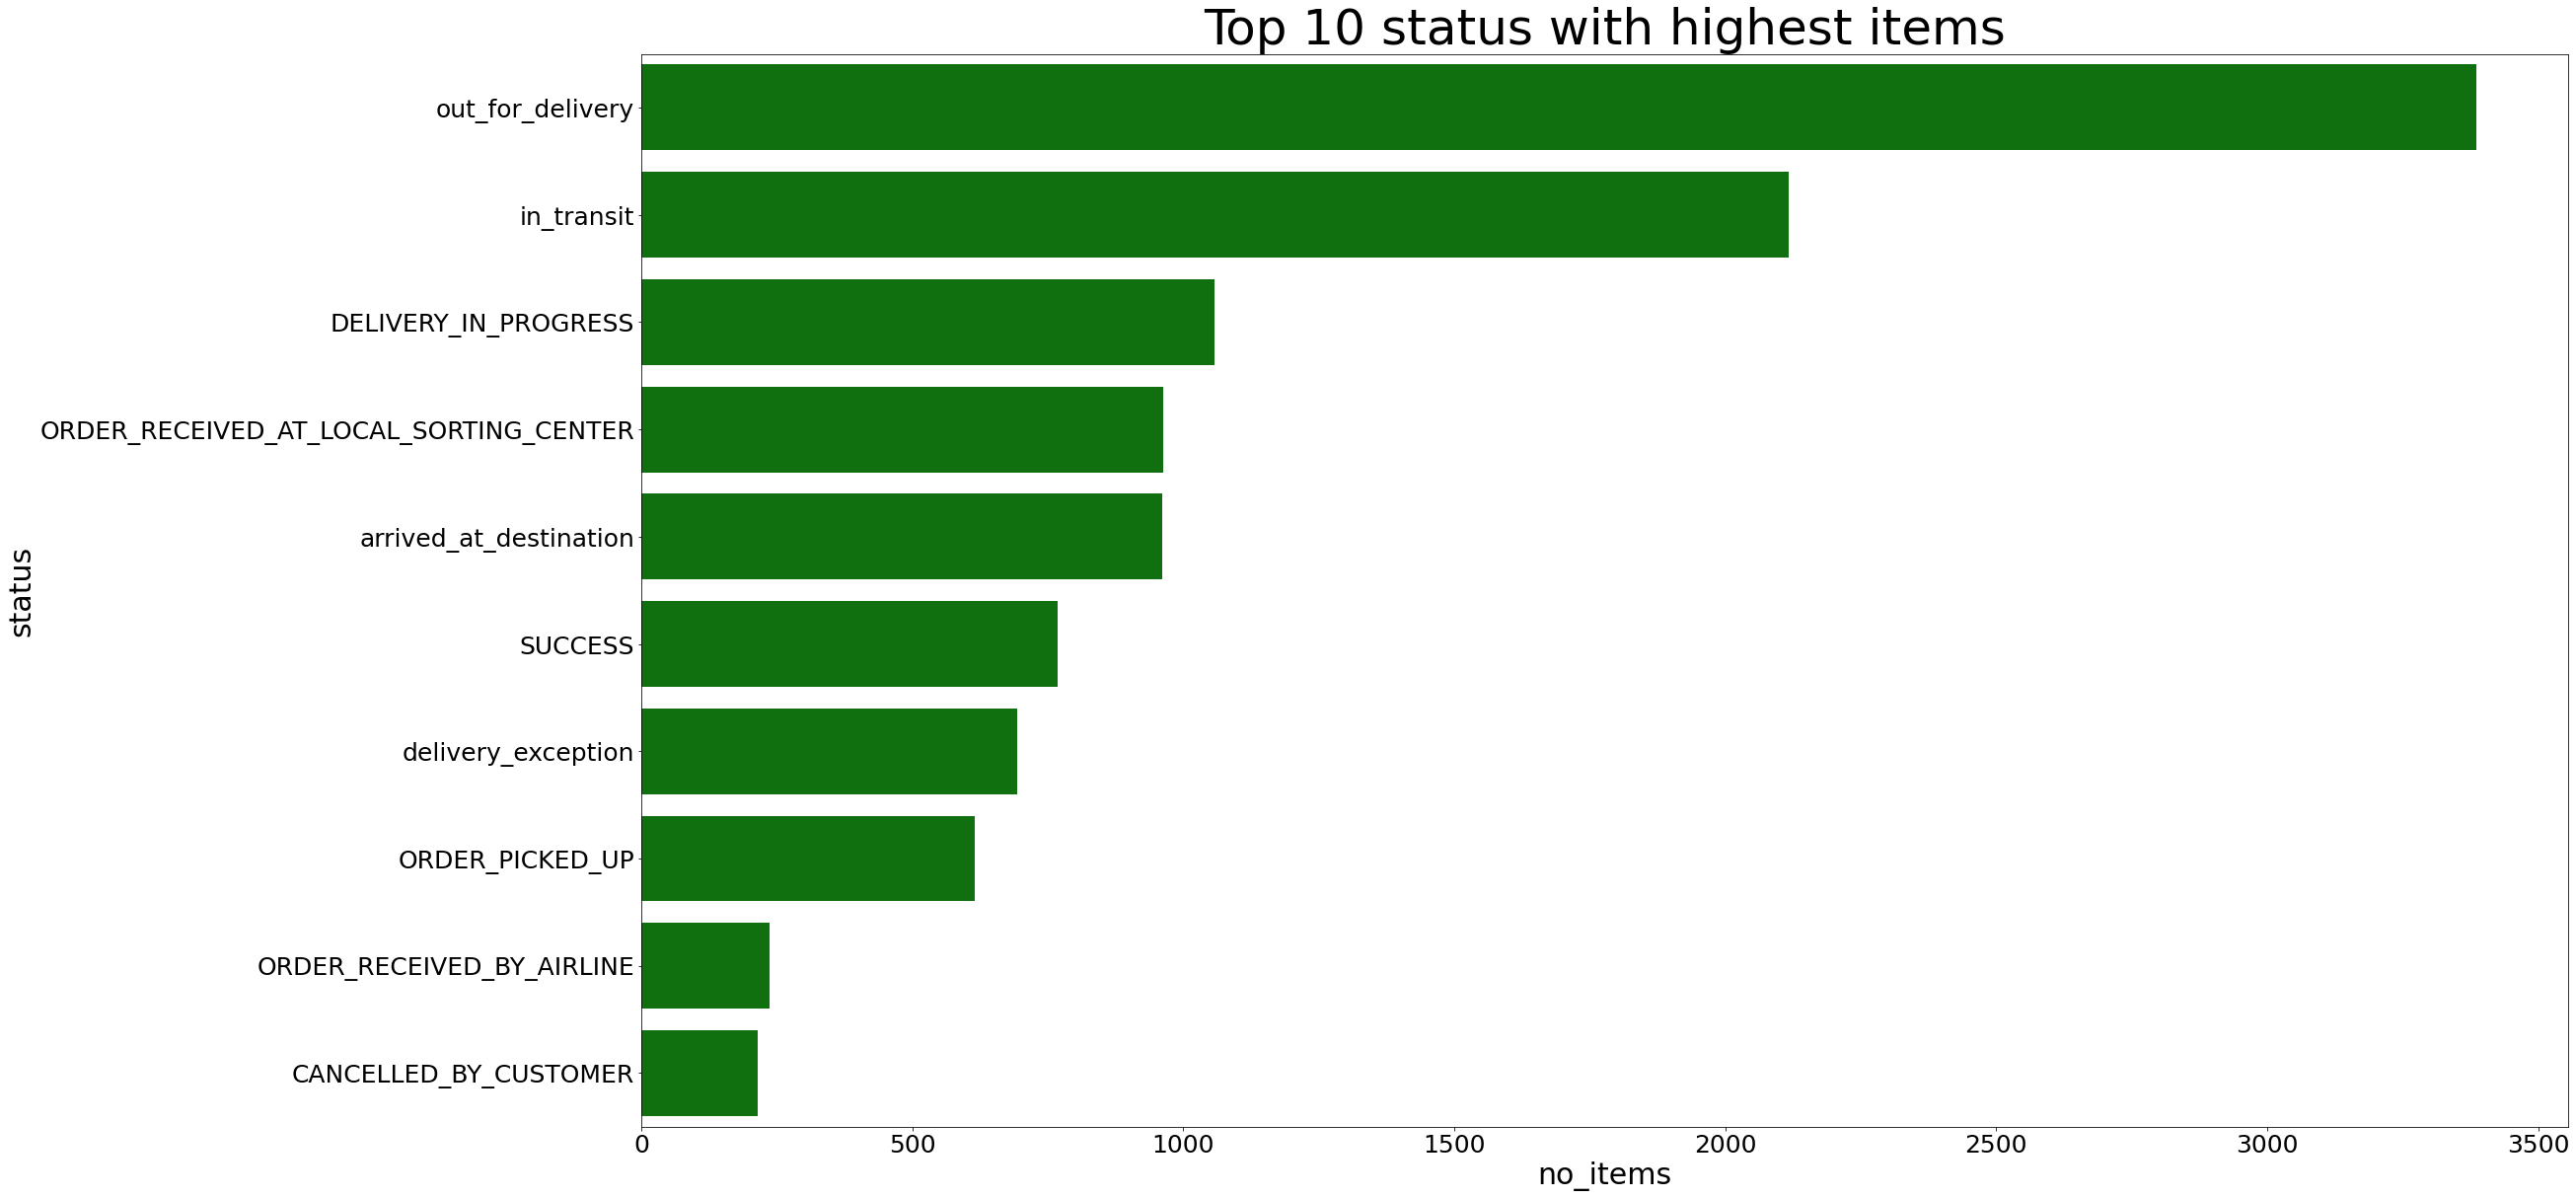

In [25]:
top_10_status = pd.DataFrame(combined_database.status.value_counts().rename('item_count').head(10))

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'item_count',y = top_10_status.index,data = top_10_status,ax=ax,color="green")
b.axes.set_title("Top 10 status with highest items",fontsize=50)
b.set_xlabel("no_items",fontsize=30)
b.set_ylabel("status",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

## Research Question 5 (items count for each carrier)

In [26]:
pd.DataFrame(combined_database.carrier.value_counts().rename("item_count"))

,item_count
carrier 1,7493
carrier 2,4369


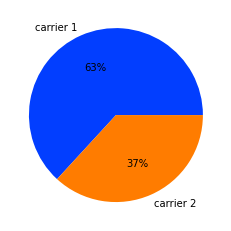

In [27]:
carrier_type = pd.DataFrame(combined_database.carrier.value_counts().rename('item_count'))

data = carrier_type.item_count
labels = carrier_type.index

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Research Question 6 (shipments count for each carrier)

In [28]:
pd.DataFrame(Trackers_df.carrier.value_counts().rename("shipment_count"))

,shipment_count
carrier 1,1000
carrier 2,1000


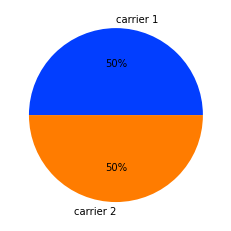

In [29]:
carrier_type = pd.DataFrame(Trackers_df.carrier.value_counts().rename('shipment_count'))

data = carrier_type.shipment_count
labels = carrier_type.index

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Research Question 7 (items count for each destination)

In [30]:
#converting country code to country name
country_count = pd.DataFrame(combined_database.country_name.value_counts().rename("item_count"))


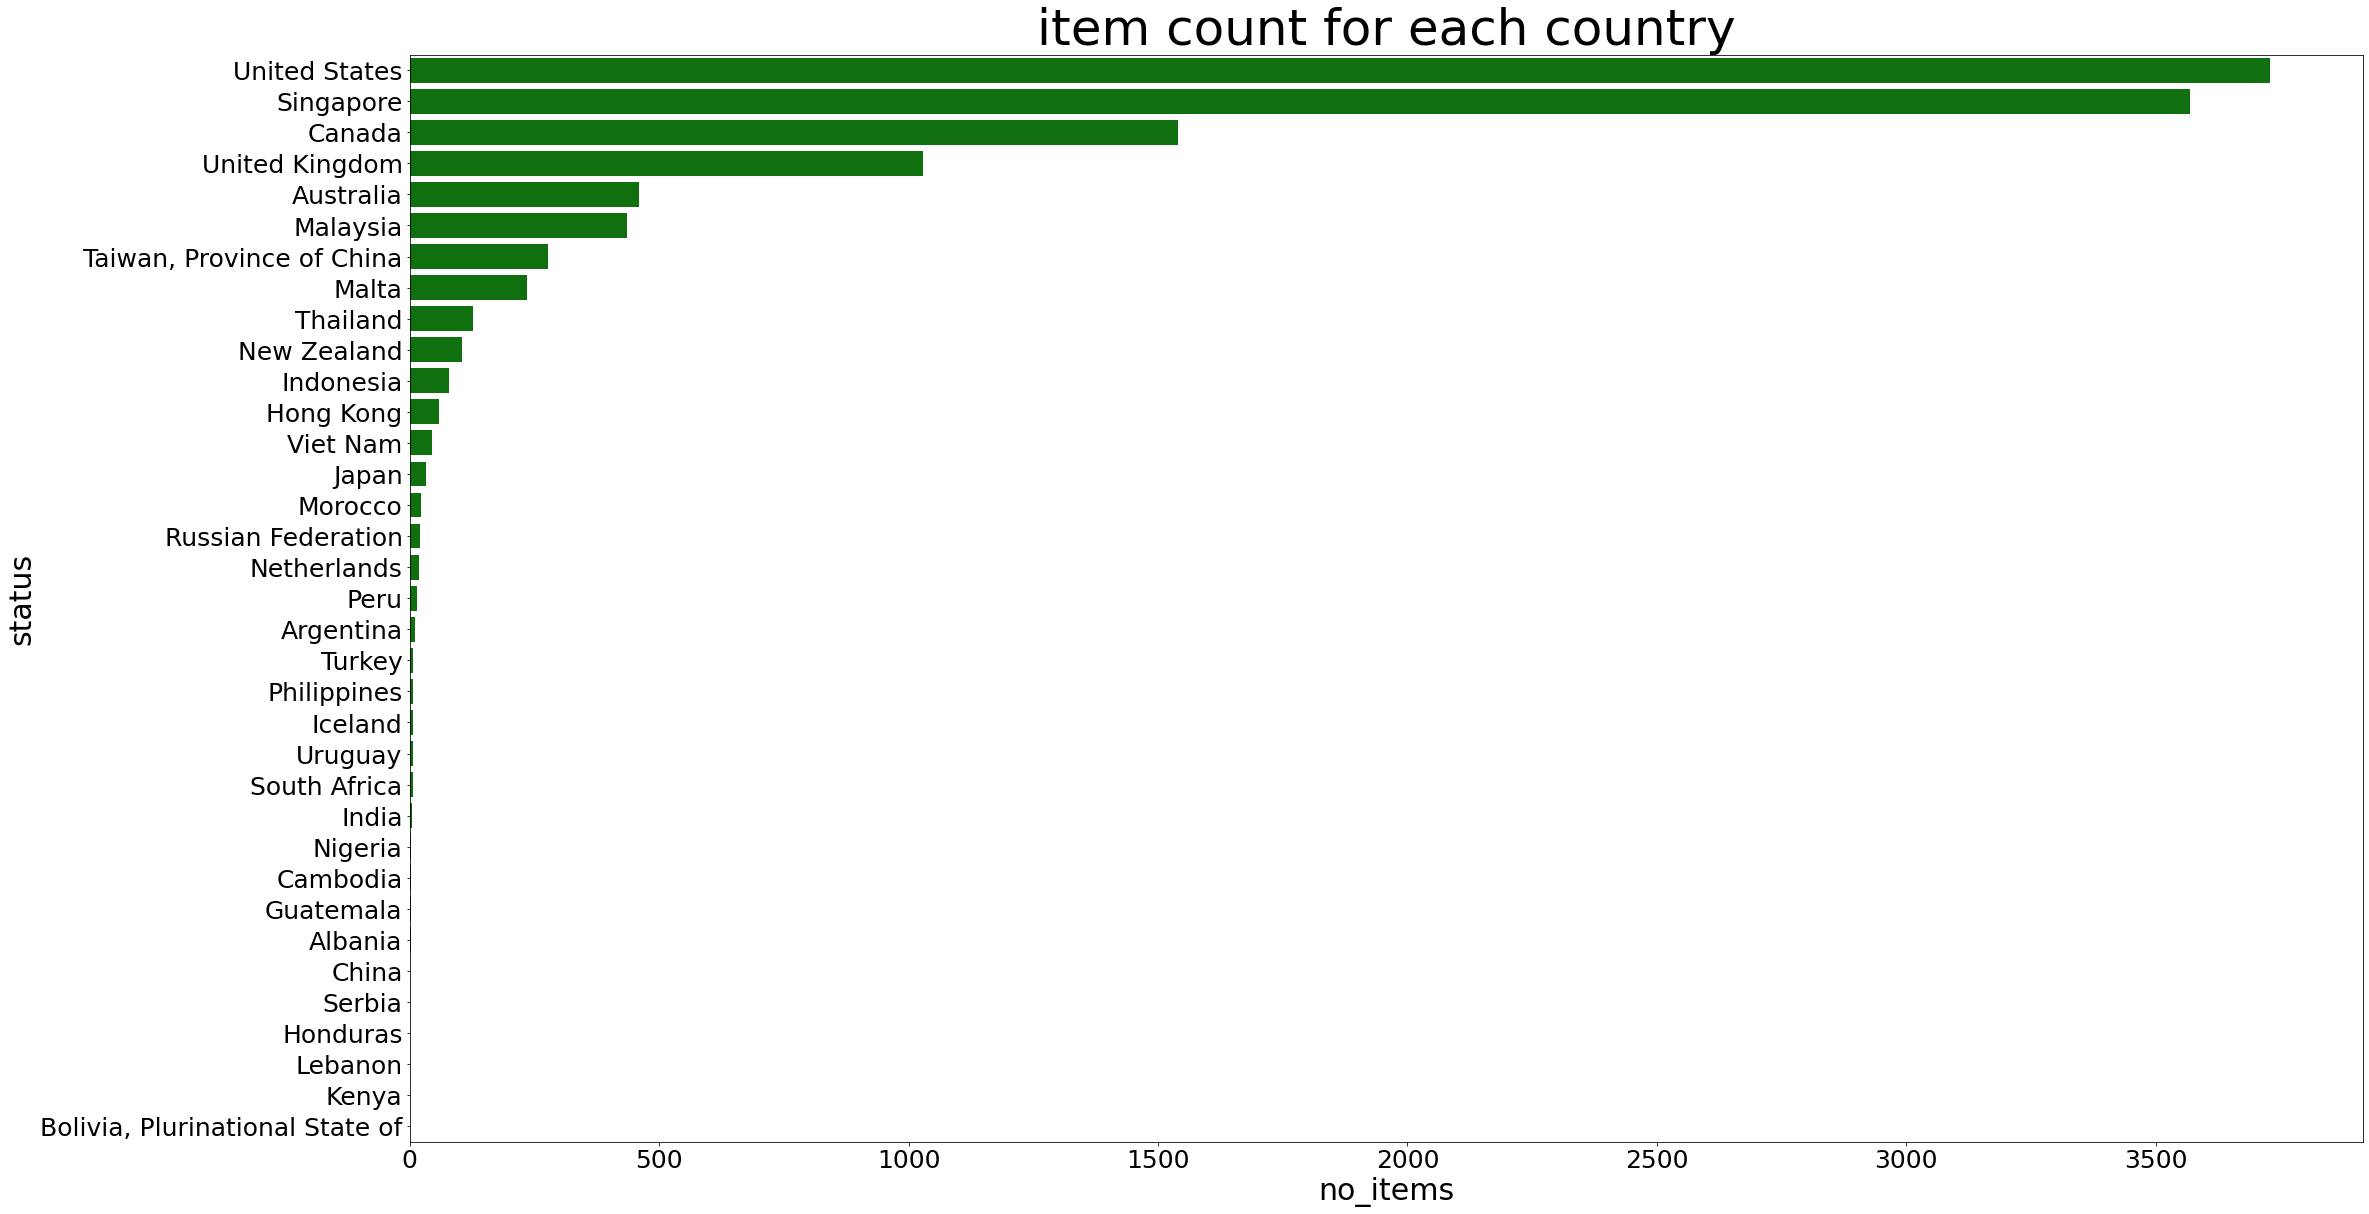

In [31]:
#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'item_count',y = country_count.index,data = country_count,ax=ax,color="green")
b.axes.set_title("item count for each country",fontsize=50)
b.set_xlabel("no_items",fontsize=30)
b.set_ylabel("status",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

## Research Question 8 (shipments count for each destination)

In [32]:
#converting country code to country name
country_count = pd.DataFrame(result.country_name.value_counts().rename("shipment_count"))

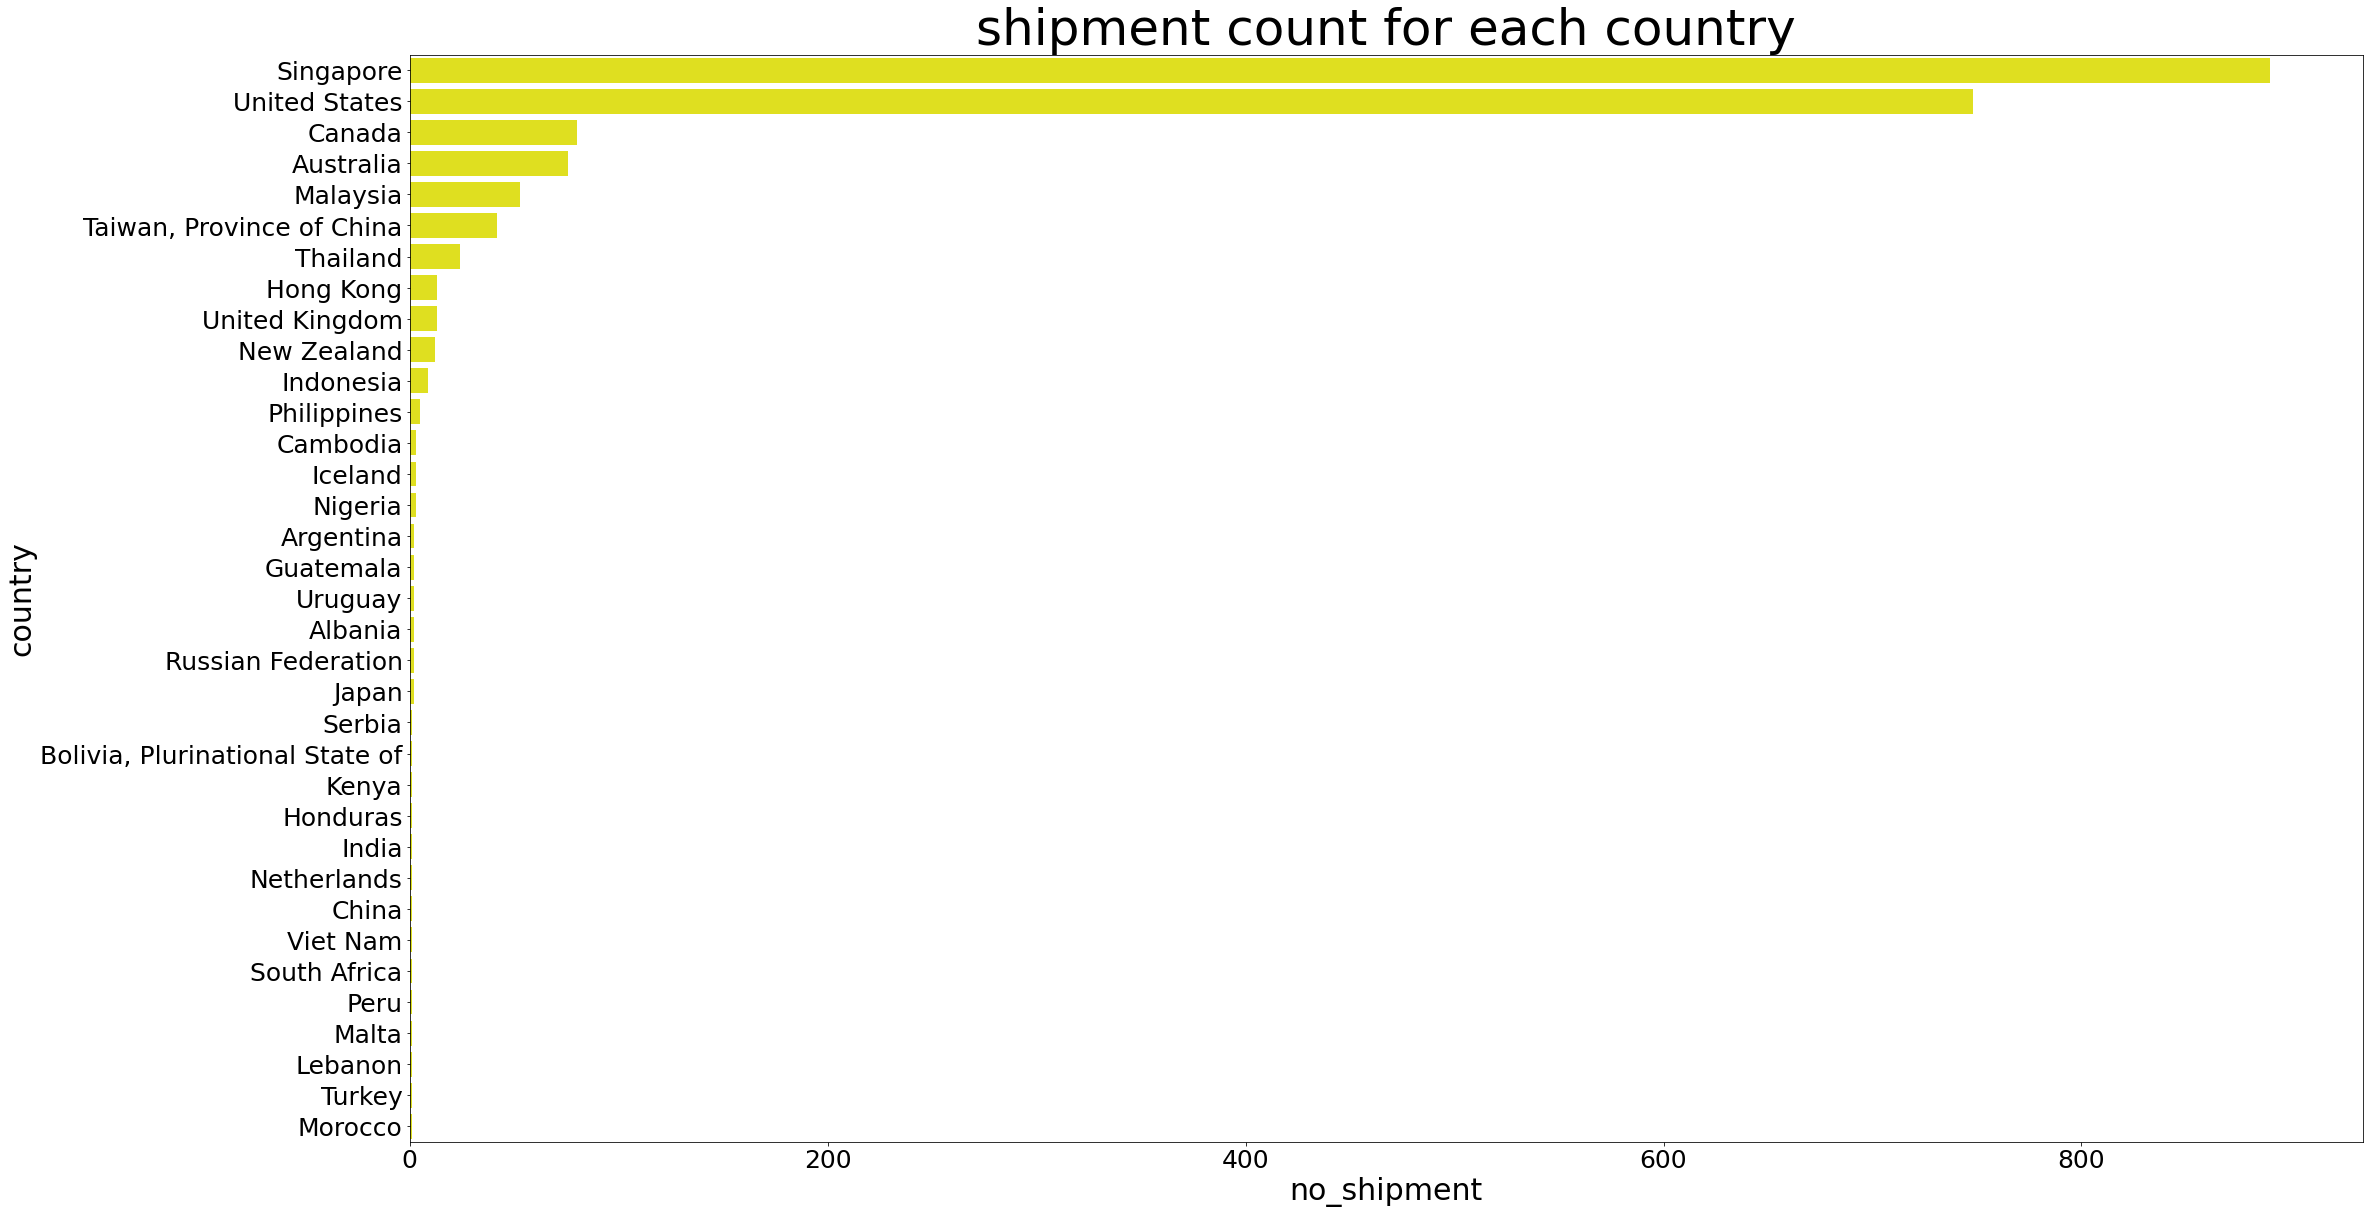

In [33]:
#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = 'shipment_count',y = country_count.index,data = country_count,ax=ax,color="yellow")
b.axes.set_title("shipment count for each country",fontsize=50)
b.set_xlabel("no_shipment",fontsize=30)
b.set_ylabel("country",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

## Research Question 9 (items count for each month)

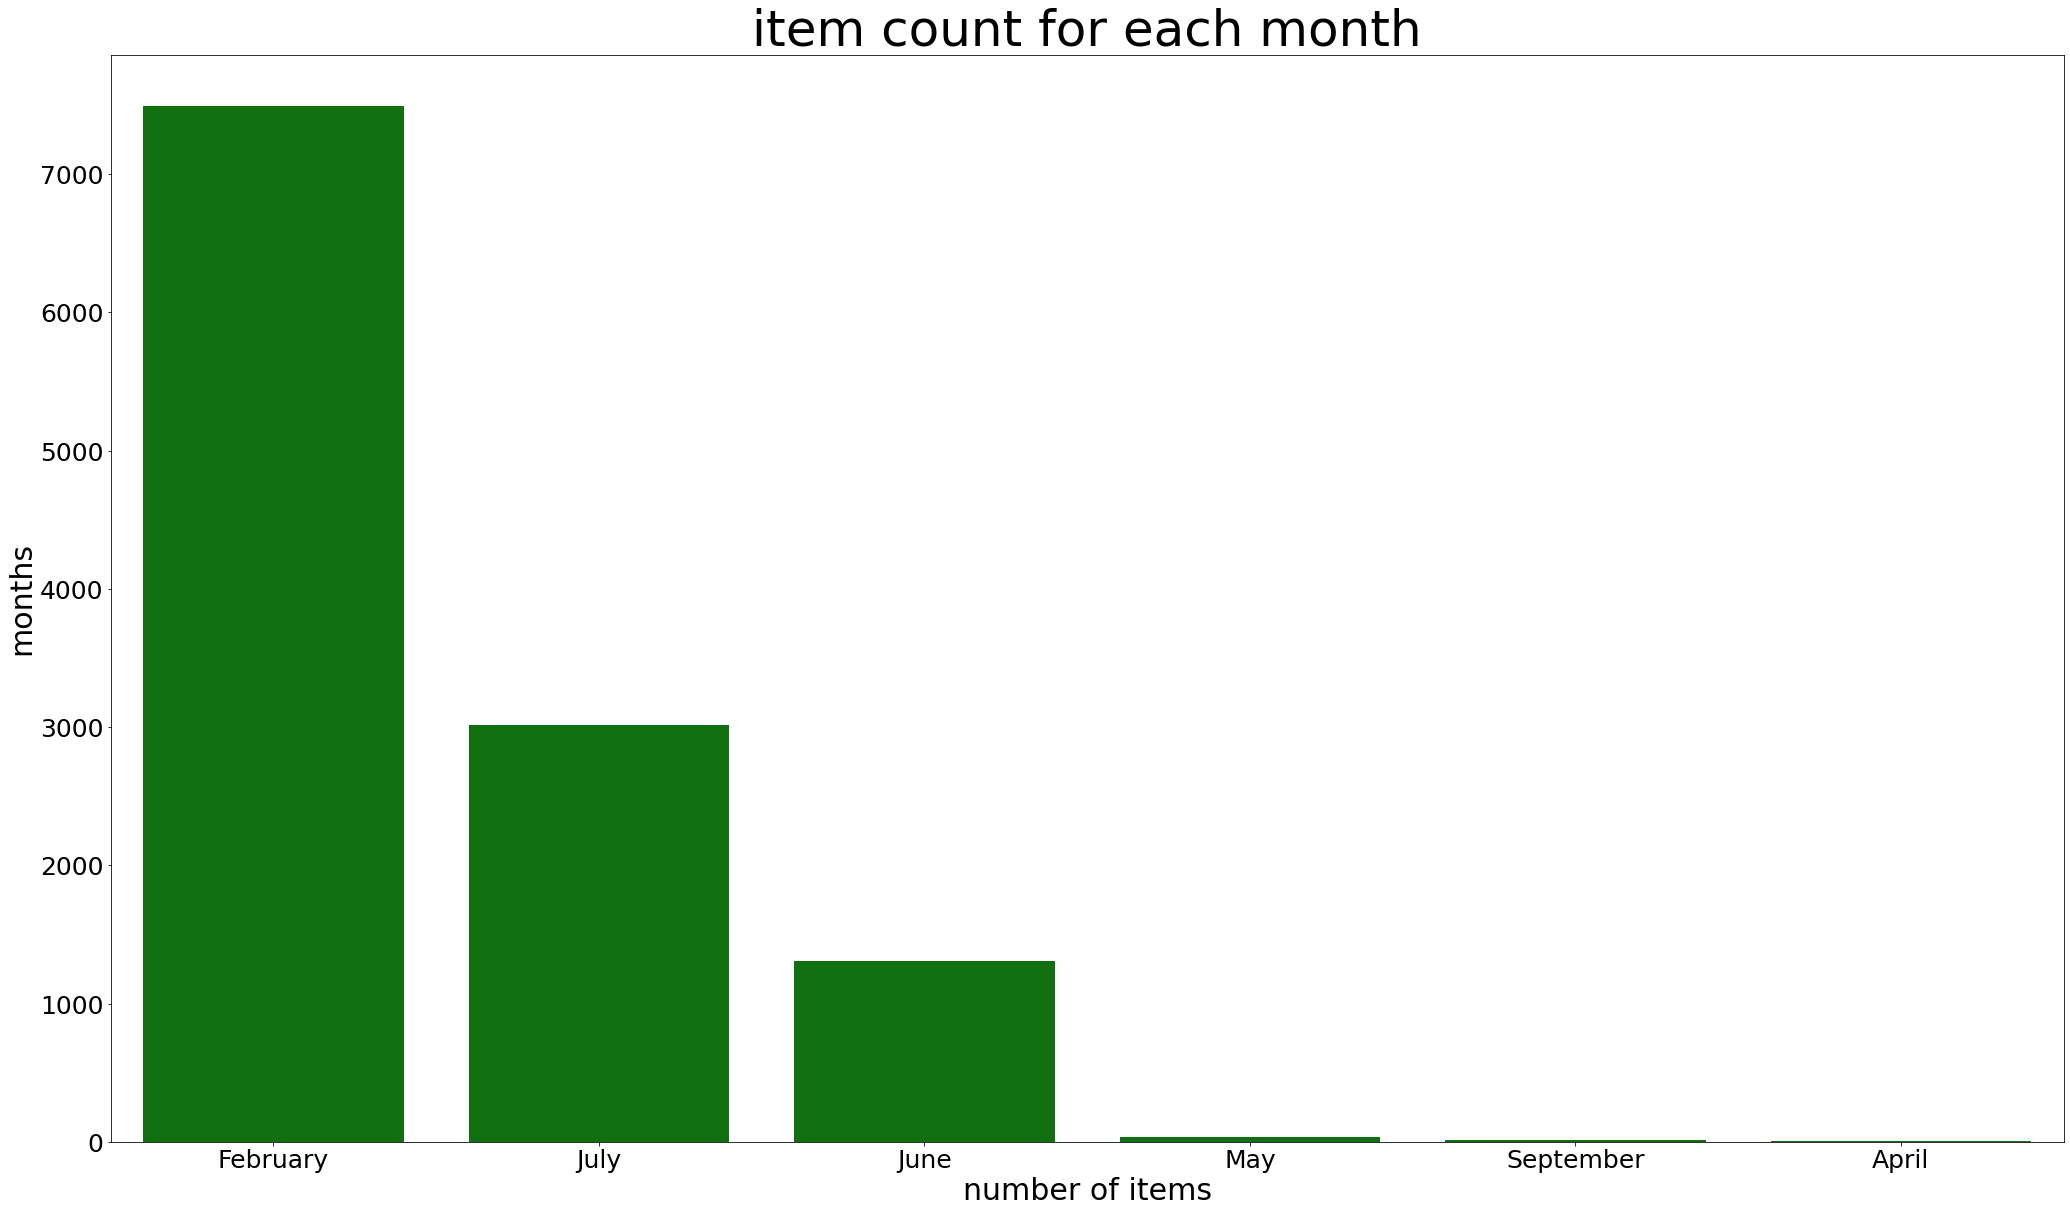

In [34]:
month_count = pd.DataFrame(combined_database.release_month.value_counts().rename("item_count"))

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = month_count.index,y = 'item_count' ,data = month_count,ax=ax,color="green")
b.axes.set_title("item count for each month",fontsize=50)
b.set_xlabel("number of items",fontsize=30)
b.set_ylabel("months",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

## Research Question 10 (shipment count for each month)

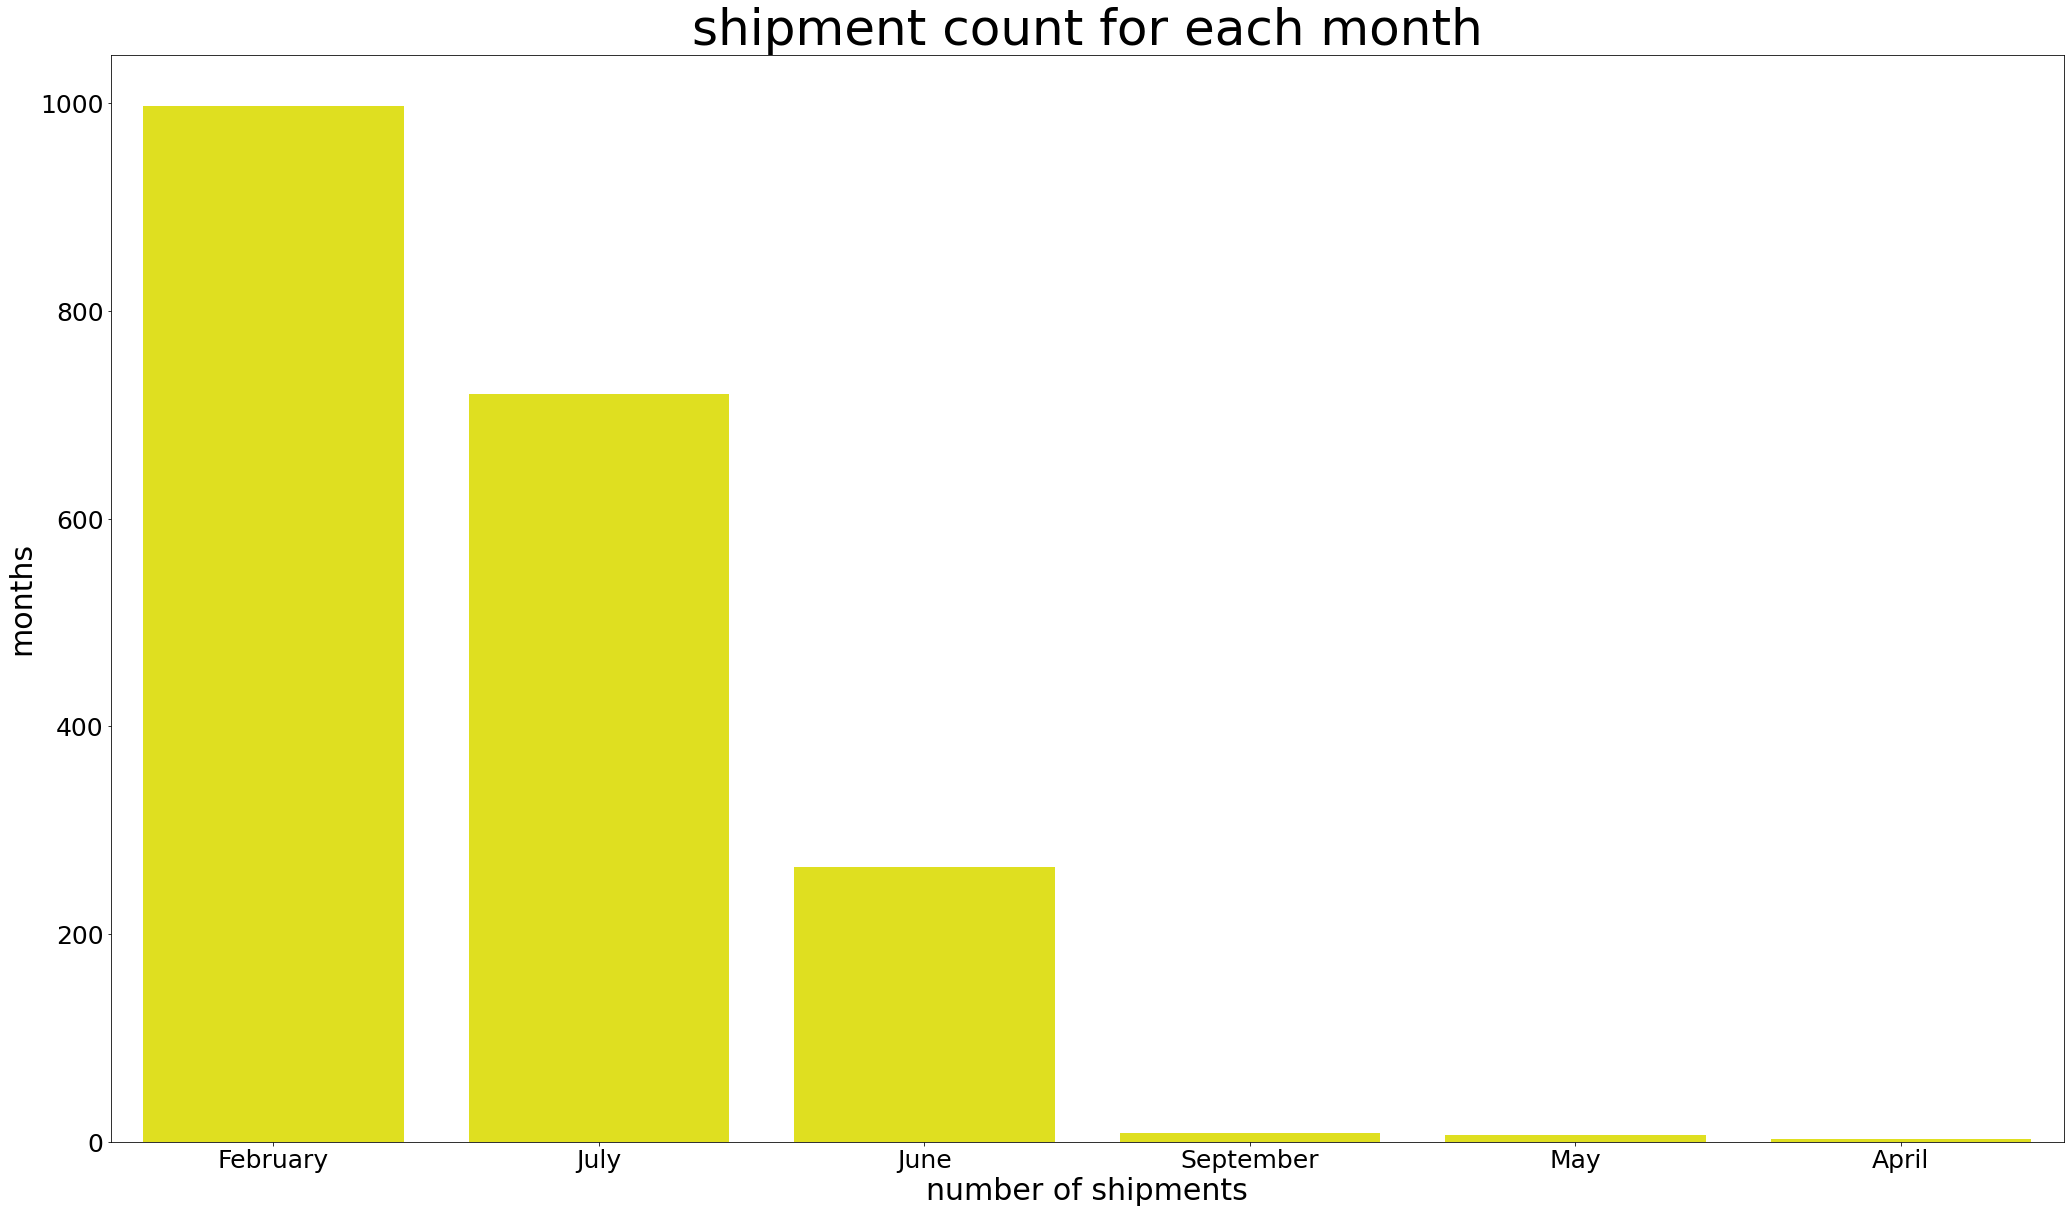

In [35]:
#converting country code to country name
month_shipment_count = pd.DataFrame(result_v2.release_month.value_counts().rename("shipment_count"))


#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = month_shipment_count.index,y = "shipment_count",data = month_shipment_count,ax=ax,color="yellow")
b.axes.set_title("shipment count for each month",fontsize=50)
b.set_xlabel("number of shipments",fontsize=30)
b.set_ylabel("months",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

## Research Question 11 (items count for the day of the week)

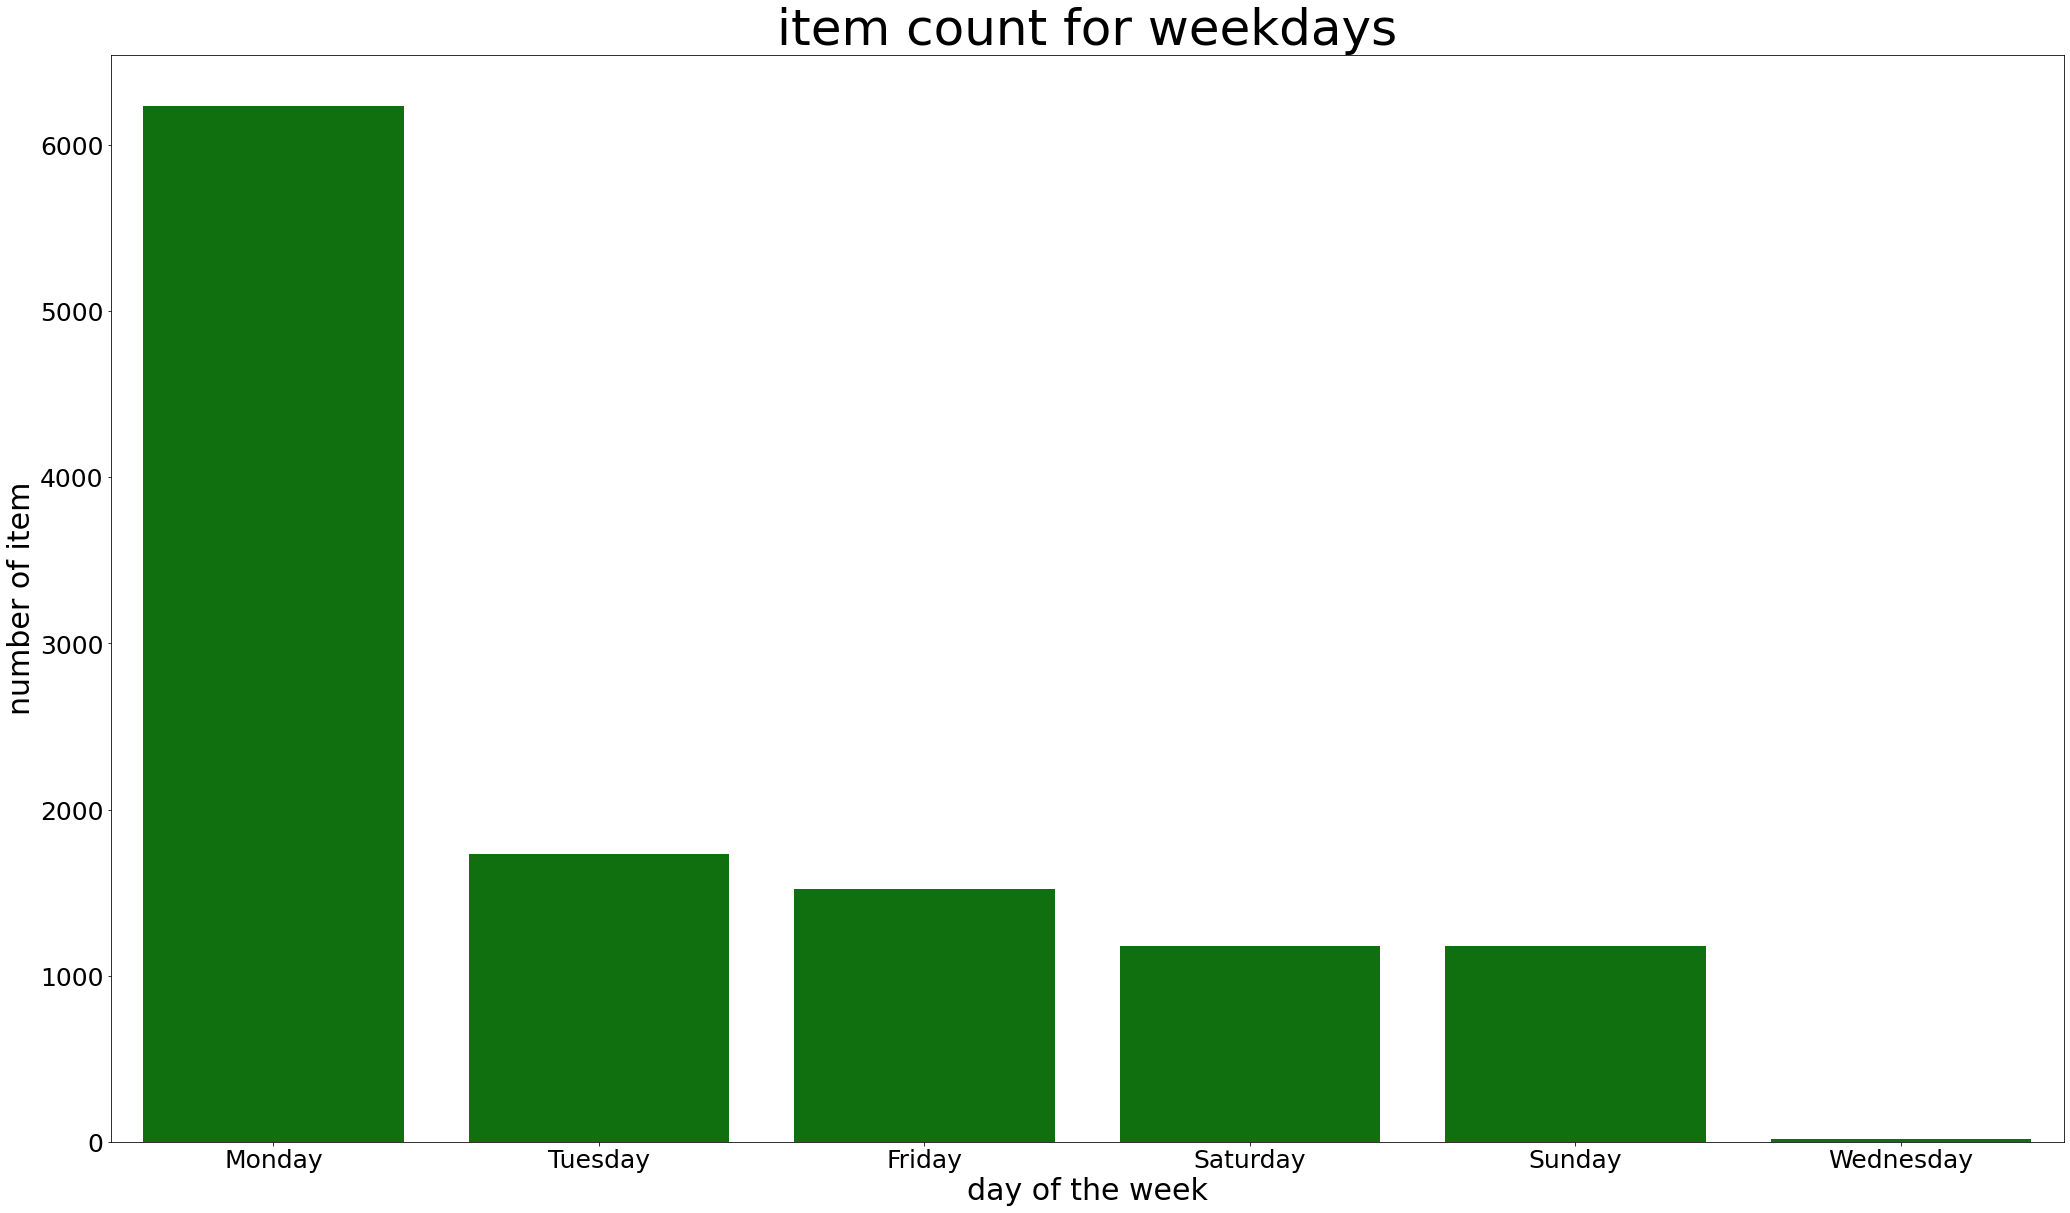

In [36]:
day_count = pd.DataFrame(combined_database.release_weekdays.value_counts().rename("item_count"))

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = day_count.index,y = 'item_count' ,data = day_count,ax=ax,color="green")
b.axes.set_title("item count for weekdays",fontsize=50)
b.set_xlabel("day of the week",fontsize=30)
b.set_ylabel("number of item",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

## Research Question 12 (shipment count for the days)

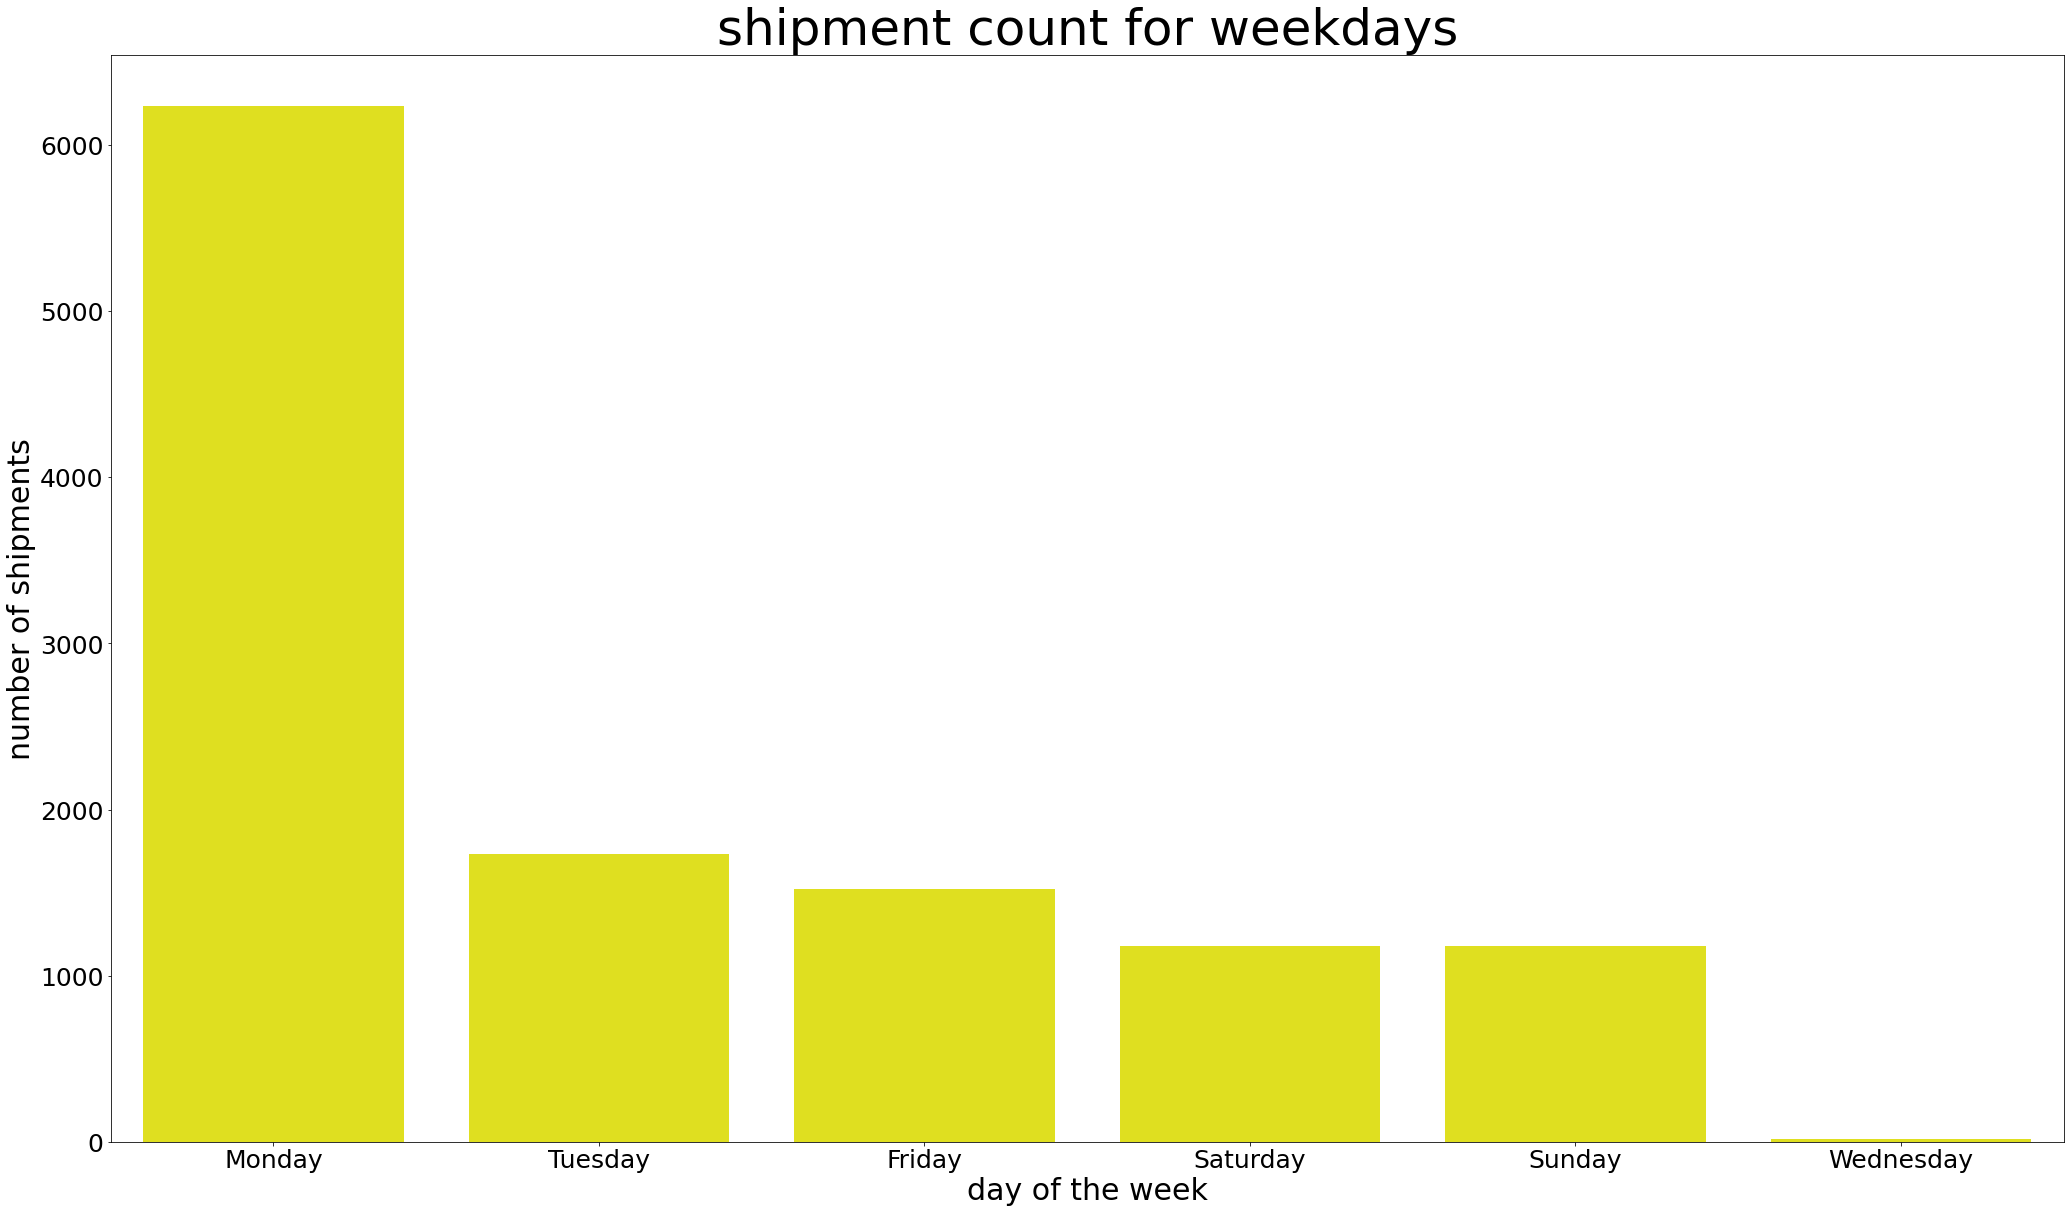

In [37]:
day_shipment_count = pd.DataFrame(combined_database.release_weekdays.value_counts().rename("item_count"))

#plotting a barchart to that effect
fig, ax = plt.subplots(figsize=(35,20)) 
b = sns.barplot(x = day_shipment_count.index,y = 'item_count' ,data = day_shipment_count,ax=ax,color="yellow")
b.axes.set_title("shipment count for weekdays",fontsize=50)
b.set_xlabel("day of the week",fontsize=30)
b.set_ylabel("number of shipments",fontsize=30)
b.tick_params(labelsize=25)
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Insight_1**:  From the Survey the 19th of February 2007 recorded the highest number of items been shipped coupled with the highest number of shipments during the periods captured in the survey.

> **Insight_2**:  Based on the quantities of items in each shipment, the shipment with id number 60131006 contains the highest number of items.

> **Insight_3**: Over 3000 of these items were out for delivery which represent the highest item/shipment status recorded while 768 items were successfully delivered with 131 failures.

> **Insight_4**: Carrier 1 conveyed over 7000 items in 1000 shipments while Carrier 2 covered 4369 in 1000 shipments during this period of survey.

> **Insight_5**: The highest number of items was shipped from USA followed by Singapore with Singapore recording the highest number of shipments carried out.

> **Insight_6**: February recorded the highest items shipped with only 6 months captured in our survey.

<a id='limitations'></a>
## Deficiciency/Area of Improvement

> **Deficiciency_1**: No information concerning the type of datatime associated with the various tables.
>>> **Improvement_1**: supply information concerning the type of datatime associated with the various tables.
    
> **Deficiciency_2**: State and district information are not made available.
>>> **Improvement_3**: supply  State and district information.

> **Deficiciency_3**: No indication of shipped and destination location.
>>> **Improvement_3**: indicates shipped and destination location.

In [38]:
with pd.ExcelWriter('Transformed_cleaned_data.xlsx') as writer:
            combined_database.to_excel(writer, sheet_name = 'sheet1', index = True)